#https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6 
import sys
!{sys.executable} -m pip install yfinance


In [1]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn

In [2]:
# SP500 complete
start=datetime.datetime(1992, 1, 2)
end=datetime.datetime(2013, 1, 1)

#end=datetime.datetime(2013, 1, 1)
SP500 = yf.Ticker("^GSPC")
SP500 = SP500.history(start = start, end = end, period = "1d", prepost=False)


In [3]:
print(SP500.index)

DatetimeIndex(['1992-01-02', '1992-01-03', '1992-01-06', '1992-01-07',
               '1992-01-08', '1992-01-09', '1992-01-10', '1992-01-13',
               '1992-01-14', '1992-01-15',
               ...
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27',
               '2012-12-28', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=5291, freq=None)


In [4]:
print(len(SP500.index)*0.995)

5264.545


In [5]:
# Get Sector Data from Wikipedia
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)

In [6]:
print(sectors)

{'Health Care', 'Information Technology', 'Communication Services', 'Consumer Staples', 'Industrials', 'Financials', 'Materials', 'Energy', 'Utilities', 'Consumer Discretionary', 'Real Estate'}


In [7]:
NumberOfCompanies = 0

#### Fill almost complete Time Series

If a Time Series is not complete, but has more than 99.5% of the data: just interpolate the missing values by setting them equal to the previous value.

In [8]:
SPmissing =  yf.Ticker("^GSPC").history(start = start, end = end, period = "1d", prepost=False)


In [9]:
SPmissing = SPmissing.drop(SPmissing.index[99])
SPmissing =  SPmissing.drop(SPmissing.index[99])
SPmissing =  SPmissing.drop(SPmissing.index[1000])
SPmissing =  SPmissing.drop(SPmissing.index[5000])
print(SPmissing.index)

DatetimeIndex(['1992-01-02', '1992-01-03', '1992-01-06', '1992-01-07',
               '1992-01-08', '1992-01-09', '1992-01-10', '1992-01-13',
               '1992-01-14', '1992-01-15',
               ...
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27',
               '2012-12-28', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=5287, freq=None)


In [10]:
Missing = list(set(SP500.index) - set(SPmissing.index))
Missing = sorted(Missing)
print(Missing)

[Timestamp('1992-05-22 00:00:00'), Timestamp('1992-05-26 00:00:00'), Timestamp('1995-12-18 00:00:00'), Timestamp('2011-11-07 00:00:00')]


In [11]:
print(SPmissing)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1992-01-02   417.029999   417.269989   411.040009   417.260010   207570000   
1992-01-03   417.269989   419.790009   416.160004   419.339996   224270000   
1992-01-06   419.309998   419.440002   416.920013   417.959991   251210000   
1992-01-07   417.959991   417.959991   415.200012   417.399994   252780000   
1992-01-08   417.359985   420.230011   415.019989   418.100006   290750000   
...                 ...          ...          ...          ...         ...   
2012-12-24  1430.150024  1430.150024  1424.660034  1426.660034  1248960000   
2012-12-26  1426.660034  1429.420044  1416.430054  1419.829956  2285030000   
2012-12-27  1419.829956  1422.800049  1401.800049  1418.099976  2830180000   
2012-12-28  1418.099976  1418.099976  1401.579956  1402.430054  2426680000   
2012-12-31  1402.430054  1426.739990  1398.109985  1426.189941  

In [12]:
for i in Missing:
    print(i)
    print(SP500.loc[i])
    SPmissing.loc[i] = np.nan 
SPmissing = SPmissing.sort_index()
print(SPmissing)

1992-05-22 00:00:00
Open            4.126100e+02
High            4.148200e+02
Low             4.126000e+02
Close           4.140200e+02
Volume          1.467100e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1992-05-22 00:00:00, dtype: float64
1992-05-26 00:00:00
Open            4.140200e+02
High            4.140200e+02
Low             4.102300e+02
Close           4.114100e+02
Volume          1.977000e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1992-05-26 00:00:00, dtype: float64
1995-12-18 00:00:00
Open            6.163400e+02
High            6.163400e+02
Low             6.061300e+02
Close           6.068100e+02
Volume          4.262700e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1995-12-18 00:00:00, dtype: float64
2011-11-07 00:00:00
Open            1.253210e+03
High            1.261700e+03
Low             1.240750e+03
Close           1.261120e+03
Volume          3.429740e+09
Dividends       0.000000e+00
Stock Split

In [13]:
print(SPmissing.iloc[[99,100,1002,5003]])

            Open  High  Low  Close  Volume  Dividends  Stock Splits
Date                                                               
1992-05-22   NaN   NaN  NaN    NaN     NaN        NaN           NaN
1992-05-26   NaN   NaN  NaN    NaN     NaN        NaN           NaN
1995-12-18   NaN   NaN  NaN    NaN     NaN        NaN           NaN
2011-11-07   NaN   NaN  NaN    NaN     NaN        NaN           NaN


In [14]:
SPmissing["Close"].interpolate().iloc[[99,100,1002,5003]]

Date
1992-05-22     412.456675
1992-05-26     412.313344
1995-12-18     614.135010
2011-11-07    1264.575012
Name: Close, dtype: float64

In [15]:
print(SPmissing["Close"].iloc[95:105])

Date
1992-05-18    412.809998
1992-05-19    416.369995
1992-05-20    415.390015
1992-05-21    412.600006
1992-05-22           NaN
1992-05-26           NaN
1992-05-27    412.170013
1992-05-28    416.739990
1992-05-29    415.350006
1992-06-01    417.299988
Name: Close, dtype: float64


In [16]:
print(SPmissing["Close"].interpolate("nearest").iloc[95:105])

Date
1992-05-18    412.809998
1992-05-19    416.369995
1992-05-20    415.390015
1992-05-21    412.600006
1992-05-22    412.600006
1992-05-26    412.170013
1992-05-27    412.170013
1992-05-28    416.739990
1992-05-29    415.350006
1992-06-01    417.299988
Name: Close, dtype: float64


In [17]:
def Interpolate(DS, index):
    # takes pandas Series DS with some missing closing data and returns an interpolation for all
    # elements which are in index but not in DS.index
    Output = DS.copy()
    
    missing = set(index)-set(DS.index)
    
    for i in missing:
        Output.loc[i] = np.nan # add missing value
    Output = Output.sort_index() # sorting
    return(Output.interpolate("nearest"))

In [18]:
Interpolate(SPmissing["Close"], SP500.index)

Date
1992-01-02     417.260010
1992-01-03     419.339996
1992-01-06     417.959991
1992-01-07     417.399994
1992-01-08     418.100006
                 ...     
2012-12-24    1426.660034
2012-12-26    1419.829956
2012-12-27    1418.099976
2012-12-28    1402.430054
2012-12-31    1426.189941
Name: Close, Length: 5291, dtype: float64

In [19]:
CompaniesDF = pd.DataFrame({})
CompaniesDF.index = SP500.index
print(CompaniesDF)

Empty DataFrame
Columns: []
Index: [1992-01-02 00:00:00, 1992-01-03 00:00:00, 1992-01-06 00:00:00, 1992-01-07 00:00:00, 1992-01-08 00:00:00, 1992-01-09 00:00:00, 1992-01-10 00:00:00, 1992-01-13 00:00:00, 1992-01-14 00:00:00, 1992-01-15 00:00:00, 1992-01-16 00:00:00, 1992-01-17 00:00:00, 1992-01-20 00:00:00, 1992-01-21 00:00:00, 1992-01-22 00:00:00, 1992-01-23 00:00:00, 1992-01-24 00:00:00, 1992-01-27 00:00:00, 1992-01-28 00:00:00, 1992-01-29 00:00:00, 1992-01-30 00:00:00, 1992-01-31 00:00:00, 1992-02-03 00:00:00, 1992-02-04 00:00:00, 1992-02-05 00:00:00, 1992-02-06 00:00:00, 1992-02-07 00:00:00, 1992-02-10 00:00:00, 1992-02-11 00:00:00, 1992-02-12 00:00:00, 1992-02-13 00:00:00, 1992-02-14 00:00:00, 1992-02-18 00:00:00, 1992-02-19 00:00:00, 1992-02-20 00:00:00, 1992-02-21 00:00:00, 1992-02-24 00:00:00, 1992-02-25 00:00:00, 1992-02-26 00:00:00, 1992-02-27 00:00:00, 1992-02-28 00:00:00, 1992-03-02 00:00:00, 1992-03-03 00:00:00, 1992-03-04 00:00:00, 1992-03-05 00:00:00, 1992-03-06 00:00:00

In [20]:
def SectorNormReturns(sec,df, start, end, lag):
    global NumberOfCompanies
    # takes the name of a sector and returns the aggregated data of all companies' normalised returns from 
    # start to endhich have full data for this time period
    # Normalising via averages over lag
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    
    Counter = 0 # how many "valid" time series?
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end, period = "1d")
        StockData = StockData["Close"]
        print(sym,len(StockData.index), len(StockData.index) == len(SP500.index))
        
        
        # only add stocks to sector data which have full history
        if len(StockData.index) == len(SP500.index):
            
            Counter +=1
            
            
            # calculate returns via difference operator and an index shift
            StockShifted = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            StockShifted.index = StockData.index[1:(len(StockData))]
            StockData = (StockData.diff()/StockShifted) 
        
            # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            #print(sym, PlusOutput)

            Output = Output.add(PlusOutput)
            CompaniesDF[sym] = PlusOutput
            
        # if the data is incomplete, but almost complete    
        elif len(StockData.index) > 0.995*len(SP500.index): 
            
            # Interpolate the data
            StockData = Interpolate(StockData, SP500.index)
                        
            Counter +=1
            
            
            # calculate returns via difference operator and an index shift
            StockShifted = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            StockShifted.index = StockData.index[1:(len(StockData))]
            StockData = (StockData.diff()/StockShifted) 
        
            # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            #print(sym, PlusOutput)

            Output = Output.add(PlusOutput)
            CompaniesDF[sym] = PlusOutput
            
            
    NumberOfCompanies += Counter    
    print(Counter)   
    return(Output)

In [40]:
def NormSectorReturns(sec,df, start, end, lag):
    global NumberOfCompanies
    # takes the name of a sector and returns the aggregated data of all companies' normalised returns from
    # start to end which have full data for this time period
    # Normalising via averages over lag
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    # DIFFERENCE TO ABOVE: FRIST add all of the sector's companies Time Series, then calculate the sector returns + normalise

    Counter = 0 # how many "valid" time series?

    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series

    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector



    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end, period = "1d")
        StockData = StockData["Close"]
        print(sym,len(StockData.index), len(StockData.index) > 0.995*len(SP500.index))


        # only add stocks to sector data which have full history
        if len(StockData.index) == len(SP500.index):

            Counter +=1
            Output =Output.add(StockData)

        # if the data is incomplete, but almost complete
        elif len(StockData.index) > 0.995*len(SP500.index):

            # Interpolate the data
            StockData = Interpolate(StockData, SP500.index)

            Counter +=1
            Output =Output.add(StockData)

    # calutlate the sector's returns
    OutputShifted = pd.Series(Output.iloc[0:(len(Output)-1)])
    OutputShifted.index = Output.index[1:]
    OutputReturns = (Output.diff() / OutputShifted)


    # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
    OutputShiftLag = pd.Series(Output.iloc[0:(len(Output)-1)])
    OutputShiftLag.index = Output.index[1:]
    RenormalisedOutput = (Output - OutputShiftLag.rolling(lag).mean()) / OutputShiftLag.rolling(lag).std()

    return(RenormalisedOutput)

In [41]:
# Normalizes returns

NormRetDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    print(len(SectorDF["Symbol"]))
    
    #Seclist.append(SectorPrices(s, start, end))
    #NormRetDF[s] = SectorNormReturns(s, df,start, end, 13)
    NormRetDF[s] = NormSectorReturns(s, df,start, end, 13)



Health Care
65
ABT 5291 True
- ABBV: Data doesn't exist for startDate = 694306800, endDate = 1356994800
ABBV 0 False
ABMD 5291 True
A 3299 False
ALGN 2998 False
ABC 4468 False
AMGN 5291 True
ANTM 2812 False
BAX 5291 True
BDX 5291 True
BIO 5291 True
TECH 5291 True
BIIB 5291 True
BSX 5195 False
BMY 5291 True
CAH 5291 True
- CTLT: Data doesn't exist for startDate = 694306800, endDate = 1356994800
CTLT 0 False
CNC 2781 False
CERN 5291 True
CRL 3149 False
CI 5291 True
COO 5291 True
CVS 5291 True
DHR 5291 True
DVA 4322 False
XRAY 5291 True
DXCM 1943 False
EW 3211 False
GILD 5277 True
HCA 456 False
HSIC 4319 False
HOLX 5291 True
HUM 5291 True
IDXX 5291 True
ILMN 3125 False
INCY 4824 False
ISRG 3154 False
- IQV: Data doesn't exist for startDate = 694306800, endDate = 1356994800
IQV 0 False
JNJ 5291 True
LH 5291 True
LLY 5291 True
MCK 4567 False
MDT 5291 True
MRK 5291 True
MTD 3805 False
- MRNA: Data doesn't exist for startDate = 694306800, endDate = 1356994800
MRNA 0 False
MOH 2392 False
- OGN

In [1]:
print(NormRetDF)

NameError: name 'NormRetDF' is not defined

In [43]:
#NormRetDF.to_csv("NormalisedSectorReturns.csv")

In [22]:
print(NormRetDF)

            Health Care  Information Technology  Communication Services  \
Date                                                                      
1992-01-02          NaN                     NaN                     NaN   
1992-01-03          NaN                     NaN                     NaN   
1992-01-06          NaN                     NaN                     NaN   
1992-01-07          NaN                     NaN                     NaN   
1992-01-08          NaN                     NaN                     NaN   
...                 ...                     ...                     ...   
2012-12-24   -12.149288              -14.597291               -0.863788   
2012-12-26   -34.543019              -27.670681               -3.661477   
2012-12-27    -0.921952               -7.213355               -2.525313   
2012-12-28   -38.461644              -32.182958               -6.603989   
2012-12-31    49.039608               48.674081               13.043775   

            Consumer Sta

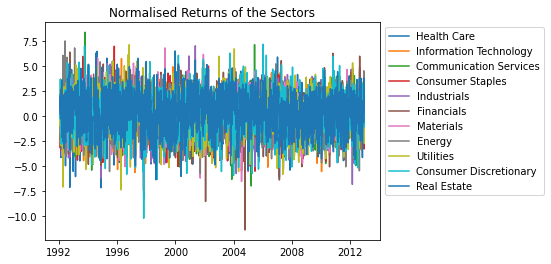

In [51]:
for i in NormRetDF.columns:
    plt.plot(NormRetDF[i], label=i, alpha = 0.5)
    
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Normalised Returns of the Sectors")
plt.savefig("Returns of Sectors")
plt.show()

## Some Data Analysis

In [45]:
Corr = NormRetDF.corr()

for i in Corr.columns:
    print(np.mean(Corr[i]),i)

Corr

0.5326891623566422 Health Care
0.5088023844675966 Information Technology
0.5349391842573685 Communication Services
0.49905390201420163 Consumer Staples
0.6159535138653159 Industrials
0.5440563446450913 Financials
0.5503240478192978 Materials
0.40327228274897703 Energy
0.4048676524166541 Utilities
0.5130114912404529 Consumer Discretionary
0.48612431960776664 Real Estate


,Health Care,Information Technology,Communication Services,Consumer Staples,Industrials,Financials,Materials,Energy,Utilities,Consumer Discretionary,Real Estate
Health Care,1.000000,0.552787,0.521143,0.566926,0.595765,0.541976,0.493562,0.327885,0.347898,0.500087,0.411552
Information Technology,0.552787,1.000000,0.595884,0.354678,0.635833,0.464082,0.514379,0.352313,0.242920,0.467768,0.416182
Communication Services,0.521143,0.595884,1.000000,0.499627,0.615121,0.574829,0.501478,0.341865,0.356002,0.479968,0.398414
Consumer Staples,0.566926,0.354678,0.499627,1.000000,0.548235,0.524905,0.458498,0.244999,0.404207,0.484801,0.402717
Industrials,0.595765,0.635833,0.615121,0.548235,1.000000,0.673122,0.713845,0.443198,0.377881,0.610715,0.561774
Financials,0.541976,0.464082,0.574829,0.524905,0.673122,1.000000,0.493419,0.318048,0.413715,0.510983,0.469540
Materials,0.493562,0.514379,0.501478,0.458498,0.713845,0.493419,1.000000,0.469766,0.337777,0.526200,0.544641
Energy,0.327885,0.352313,0.341865,0.244999,0.443198,0.318048,0.469766,1.000000,0.339137,0.296333,0.302452
Utilities,0.347898,0.242920,0.356002,0.404207,0.377881,0.413715,0.337777,0.339137,1.000000,0.280093,0.353916
Consumer Discretionary,0.500087,0.467768,0.479968,0.484801,0.610715,0.510983,0.526200,0.296333,0.280093,1.000000,0.486179
